In [ ]:
import pandas as pd
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Greens):
    plt.figure(figsize=(50, 20), dpi=130)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Load the data
df = pd.read_csv('/content/Dataset_latest.csv')

In [ ]:
# Preprocess the data
# Handle missing values
df.fillna(0, inplace=True)  # Replace missing values with 0 or use appropriate imputation method

In [ ]:
# Split the data into input features and target variable
X = df.drop('defects', axis=1) #input features
y = df['defects'] #target variable - defects column

In [ ]:
# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [ ]:
# Train a Random Forest Classifier on the training data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train) #fit the data to the model and trained it
yp = rfc.predict(X_test) #make predictions on the test set
acc = accuracy_score(y_test, yp)
print("accuracy is: ",acc)
print(classification_report(y_test, yp))
CM = confusion_matrix(y_test, yp)
#plot_confusion_matrix(CM, classes = range(2),cmap=plt.cm.Reds)
pickle.dump(rfc, open("rfc_model.pkl", 'wb'))

accuracy is:  1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       241
        True       1.00      1.00      1.00       563

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804



In [ ]:
# Extract features using the trained Random Forest Classifier on the test data
features_train = rfc.apply(X_train)
print("Shape of features_train:", features_train.shape)
print("Features_train matrix:")
print(features_train)

features_test = rfc.apply(X_test)
print("Shape of features_test:", features_test.shape)
print("Features_test matrix:")
print(features_test)


Shape of features_train: (3216, 100)
Features_train matrix:
[[203 196 205 ... 218 195 229]
 [255 299 267 ... 260 186 244]
 [105  91 172 ... 171 179 155]
 ...
 [119 122 123 ... 121 146 174]
 [101  42 157 ... 108 157 187]
 [ 15  59  11 ...  33  21  19]]
Shape of features_test: (804, 100)
Features_test matrix:
[[  6  53  11 ...  14   6   6]
 [222 196 229 ... 227 241 231]
 [137  50 123 ... 124 146 186]
 ...
 [  4   9   5 ...   8   6   6]
 [233 248 247 ... 218 241 264]
 [213 178 226 ... 245 184 238]]


In [ ]:
# Reshape the features for use in a CNN
#Adding an extra dimension to prepare them for use as input in a CNN
#CNN Model expect input data to have a specific shape - (samples, number of trees, channels)
features_train = features_train.reshape(features_train.shape[0], features_train.shape[1], 1)
features_test = features_test.reshape(features_test.shape[0], features_test.shape[1], 1)

print("Shape of reshaped features_train:", features_train.shape)
print("Shape of reshaped features_test:", features_test.shape)


Shape of reshaped features_train: (3216, 100, 1)
Shape of reshaped features_test: (804, 100, 1)


In [ ]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(features_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2)) #Reduces the dimensionality of the input by taking the maximum value within each pooling window
model.add(Flatten()) #Convert the multidimensional output from the previous layer into a flat (one-dimensional) vector, preparing it for the subsequent fully connected layers
model.add(Dense(10, activation='relu')) #Fully connected layer
model.add(Dense(2, activation='softmax')) #binary classification


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(features_train, to_categorical(y_train), validation_data=(features_test, to_categorical(y_test)), epochs=100, batch_size=32)

Epoch 1/100
101/101 [==============================] - 2s 7ms/step - loss: 3.4719 - accuracy: 0.6275 - val_loss: 0.9720 - val_accuracy: 0.7052
Epoch 2/100
101/101 [==============================] - 1s 5ms/step - loss: 1.2913 - accuracy: 0.6654 - val_loss: 0.9238 - val_accuracy: 0.7811
Epoch 3/100
101/101 [==============================] - 1s 5ms/step - loss: 0.9350 - accuracy: 0.7323 - val_loss: 0.6062 - val_accuracy: 0.7786
Epoch 4/100
101/101 [==============================] - 1s 5ms/step - loss: 0.6665 - accuracy: 0.7668 - val_loss: 1.9802 - val_accuracy: 0.4080
Epoch 5/100
101/101 [==============================] - 1s 5ms/step - loss: 0.7497 - accuracy: 0.7612 - val_loss: 0.6403 - val_accuracy: 0.7102
Epoch 6/100
101/101 [==============================] - 0s 5ms/step - loss: 0.5809 - accuracy: 0.7954 - val_loss: 0.6104 - val_accuracy: 0.8221
Epoch 7/100
101/101 [==============================] - 1s 5ms/step - loss: 0.4884 - accuracy: 0.8141 - val_loss: 0.8507 - val_accuracy: 0.7923

Test loss: 0.2843700051307678
Test accuracy: 0.9378109574317932
26/26 [==============================] - 0s 2ms/step
Confusion Matrix:
[[203  38]
 [ 12 551]]
              precision    recall  f1-score   support

       False       0.94      0.84      0.89       241
        True       0.94      0.98      0.96       563

    accuracy                           0.94       804
   macro avg       0.94      0.91      0.92       804
weighted avg       0.94      0.94      0.94       804



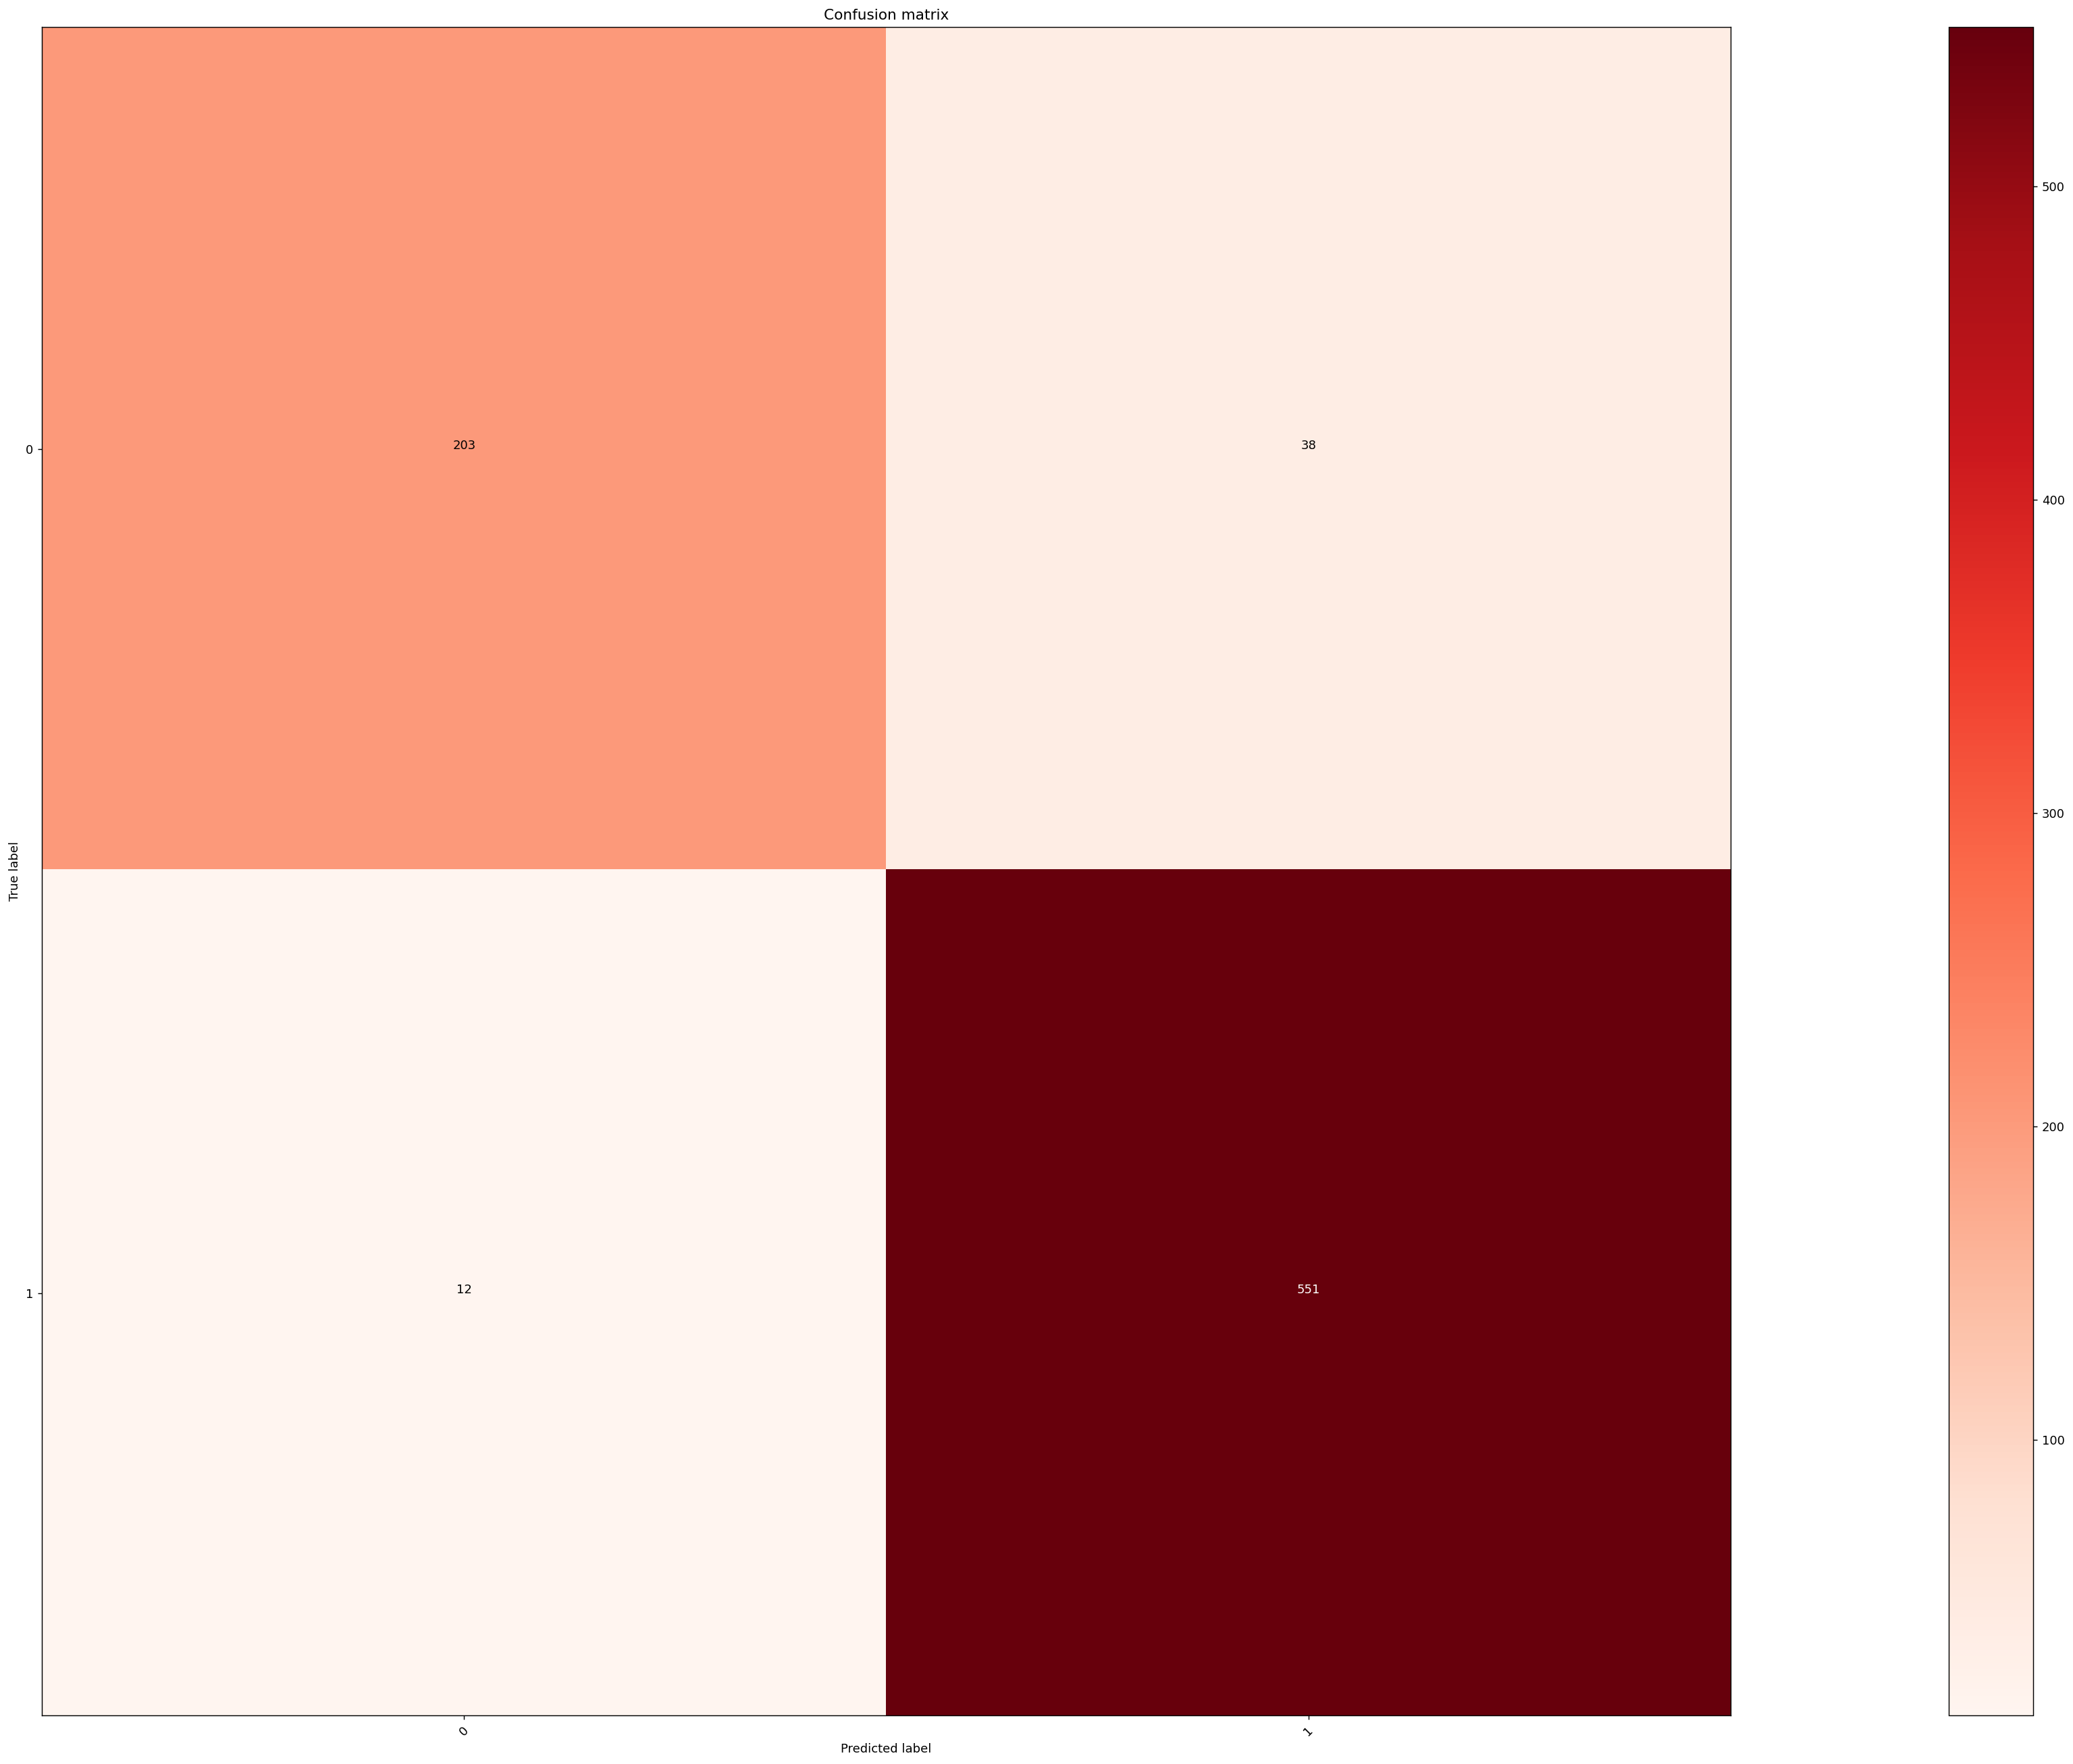

In [ ]:
# Evaluate the hybrid model on the test data
from sklearn.metrics import classification_report
import numpy as np
score = model.evaluate(features_test, to_categorical(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
from sklearn.metrics import classification_report

# Get the predicted values of the model on the test data
y_pred = model.predict(features_test)
y_pred = np.argmax(y_pred, axis=1)

# Get the true values of the test data
y_true = y_test

# Get the confusion matrix
CM = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(CM, classes = range(2),cmap=plt.cm.Reds)
print("Confusion Matrix:")
print(CM)

# Get the classification report
report = classification_report(y_true, y_pred)
print(report)


In [ ]:
model.save("cnn_model.h5")


In [ ]:
# Load the saved model
import numpy as np
from keras.models import load_model
model = load_model('/content/cnn_model.h5')
new_data = pd.read_csv("/content/angular-login-example_metric_values.csv")

# Preprocess the new data
# Handle missing values
new_data.fillna(0, inplace=True)  # Replace missing values with 0 or use appropriate imputation method

# Apply feature scaling
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

# Extract features using the trained Random Forest Classifier on the new data
new_features = rfc.apply(new_data_scaled)
new_features = new_features.reshape(new_features.shape[0], new_features.shape[1], 1)

# new_features = rfc.apply(new_data)
# new_features = new_features.reshape(new_features.shape[0], new_features.shape[1], 1)

# Make predictions using the trained model
predictions = model.predict(new_features)

# Convert the predicted probabilities into class labels
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class labels
print(predicted_classes)



In [ ]:
# Calculate confidence score for the predictions
confidence_scores = np.max(predictions, axis=1) * 100

# Print the predicted class labels and confidence scores
for i in range(len(predicted_classes)):
    #print("Project:", new_data.iloc[i]['project_name'])
    print("Predicted Class:", predicted_classes[i])
    print("Confidence Score (%):", confidence_scores[i])
    print()

Predicted Class: 1
Confidence Score (%): 99.999954

